In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Bounce_Rate_Per_Page.xlsx')

In [3]:
Home = pd.read_excel(xls, 'home')
Basket= pd.read_excel(xls, 'basket')
Redisign_bags= pd.read_excel(xls, 'redesign_bags')
Shop_by_brand_YouTube= pd.read_excel(xls, 'shop_by_brand_YouTube')
Signin= pd.read_excel(xls, 'signin')
Mens_warm_gear = pd.read_excel(xls, 'mens_warm_gear')

In [4]:
#Remove the dates for ease
Home = Home['Bounce Rate']
Basket = Basket['Bounce Rate']
Redisign_bags= Redisign_bags['Bounce Rate']
Shop_by_brand_YouTube= Shop_by_brand_YouTube['Bounce Rate']
Signin= Signin['Bounce Rate']
Mens_warm_gear = Mens_warm_gear['Bounce Rate']

In [5]:
#convert datasets into arrays
Home = Home.values
Basket = Basket.values
Redisign_bags= Redisign_bags.values
Shop_by_brand_YouTube= Shop_by_brand_YouTube.values
Signin= Signin.values
Mens_warm_gear = Mens_warm_gear.values

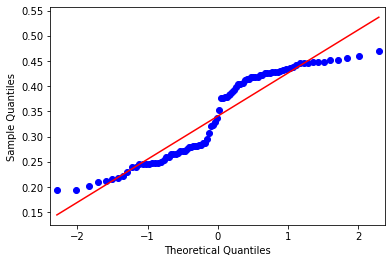

In [6]:
#plot both datasets using qqplot to check for normality
qqplot(Home, line='s')
pyplot.show()

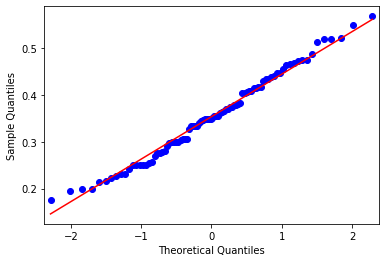

In [7]:
qqplot(Basket, line='s')

pyplot.show()

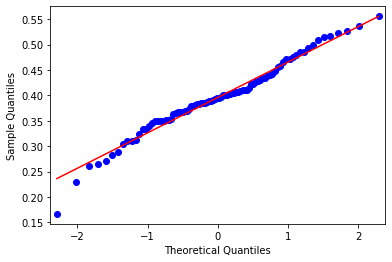

In [8]:
qqplot(Redisign_bags, line='s')

pyplot.show()

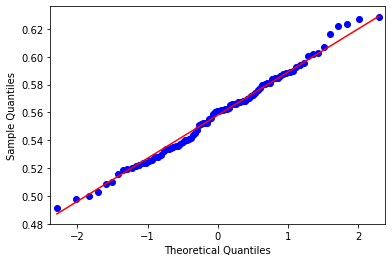

In [9]:
qqplot(Shop_by_brand_YouTube, line='s')
pyplot.show()

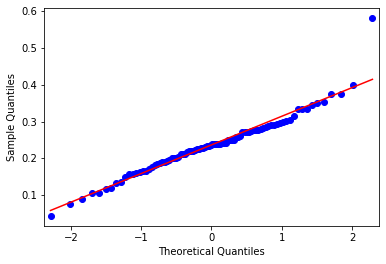

In [10]:
qqplot(Signin, line='s')
pyplot.show()

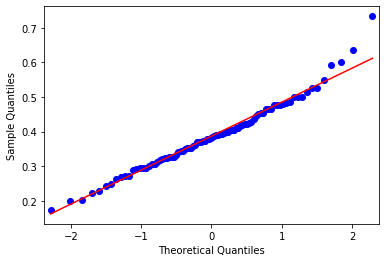

In [11]:
qqplot(Mens_warm_gear, line='s')
pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [12]:
names = ["Home", "Basket", "Redisign_bags", "Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Home, Basket, Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
	stat, p = shapiro(i)
	print(names[index])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Home
Statistics=0.891, p=0.000
Sample does not look Gaussian (reject H0)
Basket
Statistics=0.984, p=0.321
Sample looks Gaussian (fail to reject H0)
Redisign_bags
Statistics=0.982, p=0.245
Sample looks Gaussian (fail to reject H0)
Shop_by_brand_YouTube
Statistics=0.988, p=0.588
Sample looks Gaussian (fail to reject H0)
Signin
Statistics=0.955, p=0.003
Sample does not look Gaussian (reject H0)
Mens_warm_gear
Statistics=0.979, p=0.165
Sample looks Gaussian (fail to reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [13]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution.
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [14]:
stat, p = kruskal(Home, Basket, Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the datasets is not significant (fail to reject H0)')
else:
	print('The difference between the datasets is significant (reject H0)')

Statistics=306.024, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets
### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [15]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [16]:
#Home against every other page
names = ["Basket", "Redisign_bags", "Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Basket, Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
	stat, p = ranksums(Home,i)
	print('Home-',names[index])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('The difference between the two datasets is not significant (fail to reject H0)')
	else:
		print('The difference between the two datasets is significant (reject H0)')

Home- Basket
Statistics=-0.695, p=0.487
The difference between the two datasets is not significant (fail to reject H0)
Home- Redisign_bags
Statistics=-3.499, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Shop_by_brand_YouTube
Statistics=-11.587, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Signin
Statistics=7.215, p=0.000
The difference between the two datasets is significant (reject H0)
Home- Mens_warm_gear
Statistics=-2.741, p=0.006
The difference between the two datasets is significant (reject H0)


In [17]:
#Basketagainst every other page
names = ["Redisign_bags", "Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Redisign_bags, Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
	stat, p = ranksums(Basket,i)
	print('Basket-',names[index])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('The difference between the two datasets is not significant (fail to reject H0)')
	else:
		print('The difference between the two datasets is significant (reject H0)')

Basket- Redisign_bags
Statistics=-3.462, p=0.001
The difference between the two datasets is significant (reject H0)
Basket- Shop_by_brand_YouTube
Statistics=-11.223, p=0.000
The difference between the two datasets is significant (reject H0)
Basket- Signin
Statistics=7.922, p=0.000
The difference between the two datasets is significant (reject H0)
Basket- Mens_warm_gear
Statistics=-2.189, p=0.029
The difference between the two datasets is significant (reject H0)


In [18]:
#Redisign_bags against Shop_by_brand_YouTube, Signin, Mens_warm_gear and Display
names = ["Shop_by_brand_YouTube", "Signin", "Mens_warm_gear"]
for index, i in enumerate((Shop_by_brand_YouTube, Signin, Mens_warm_gear)):
	stat, p = ranksums(Redisign_bags,i)
	print('Redisign_bags-',names[index])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('The difference between the two datasets is not significant (fail to reject H0)')
	else:
		print('The difference between the two datasets is significant (reject H0)')

Redisign_bags- Shop_by_brand_YouTube
Statistics=-11.255, p=0.000
The difference between the two datasets is significant (reject H0)
Redisign_bags- Signin
Statistics=10.214, p=0.000
The difference between the two datasets is significant (reject H0)
Redisign_bags- Mens_warm_gear
Statistics=1.136, p=0.256
The difference between the two datasets is not significant (fail to reject H0)


In [19]:
#Shop_by_brand_YouTubeagainst Signin, Mens_warm_gear and Display
names = ["Signin", "Mens_warm_gear"]
for index, i in enumerate((Signin, Mens_warm_gear)):
	stat, p = ranksums(Shop_by_brand_YouTube,i)
	print('Shop_by_brand_YouTube-',names[index])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('The difference between the two datasets is not significant (fail to reject H0)')
	else:
		print('The difference between the two datasets is significant (reject H0)')

Shop_by_brand_YouTube- Signin
Statistics=11.394, p=0.000
The difference between the two datasets is significant (reject H0)
Shop_by_brand_YouTube- Mens_warm_gear
Statistics=10.391, p=0.000
The difference between the two datasets is significant (reject H0)


In [20]:
#Signinagainst Mens_warm_gear
stat, p = ranksums(Signin,Mens_warm_gear)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

Statistics=-9.255, p=0.000
The difference between the two datasets is significant (reject H0)
